In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

In [2]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [4]:
df = pd.read_csv('C:../../Dataset/FECourseData/ames.csv')

In [9]:
def make_mi_scores(X,y):
    X = X.copy()
    for colname in X.select_dtypes(['object', 'category']):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    print('----------------', discrete_features, '---------------------------')
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name='MI scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

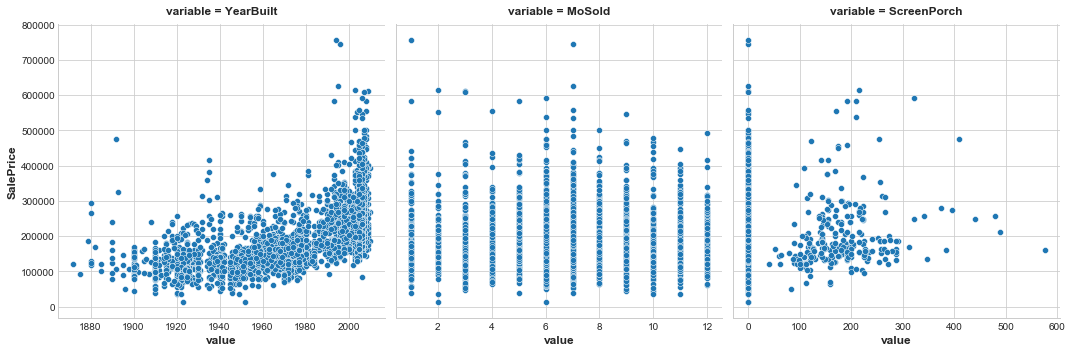

In [10]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

In [11]:
X = df.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X, y)

---------------- [True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, False, False, False, True, True, True, True, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, False, False, False, False, False, True, True, True, False, True, True, True, True] ---------------------------


In [8]:
mi_scores

OverallQual         0.581262
Neighborhood        0.569813
GrLivArea           0.496909
YearBuilt           0.437939
GarageArea          0.415014
                      ...   
Utilities           0.000291
Threeseasonporch    0.000000
BsmtFinSF2          0.000000
MoSold              0.000000
LandSlope           0.000000
Name: MI scores, Length: 78, dtype: float64

OverallQual     0.581262
Neighborhood    0.569813
GrLivArea       0.496909
YearBuilt       0.437939
GarageArea      0.415014
TotalBsmtSF     0.390280
GarageCars      0.381467
FirstFlrSF      0.368825
BsmtQual        0.364779
KitchenQual     0.326194
ExterQual       0.322390
YearRemodAdd    0.315402
MSSubClass      0.287131
GarageFinish    0.265440
FullBath        0.251693
Foundation      0.236115
LotFrontage     0.233334
GarageType      0.226117
FireplaceQu     0.221955
SecondFlrSF     0.200658
Name: MI scores, dtype: float64


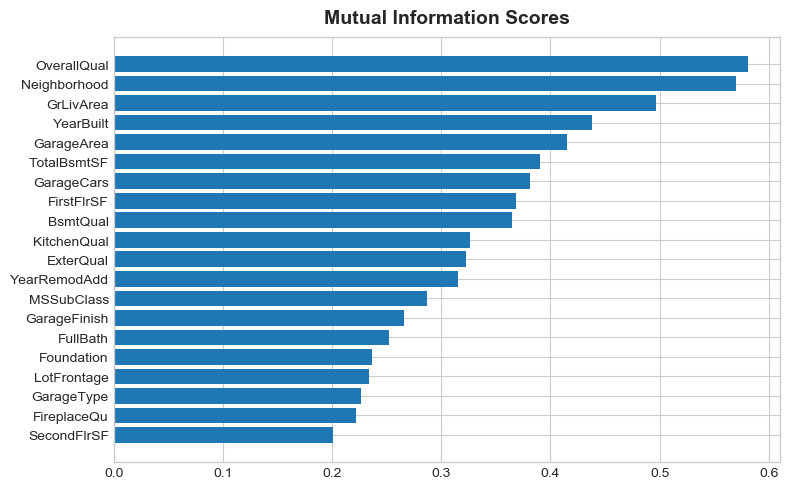

In [12]:
print(mi_scores.head(20))
# print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))
# plot_mi_scores(mi_scores.tail(20)) 

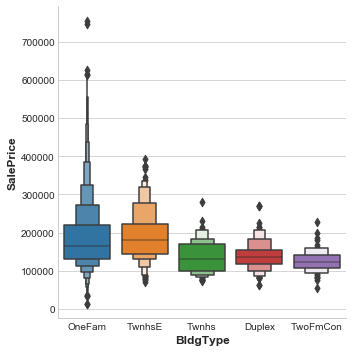

In [13]:
sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen");

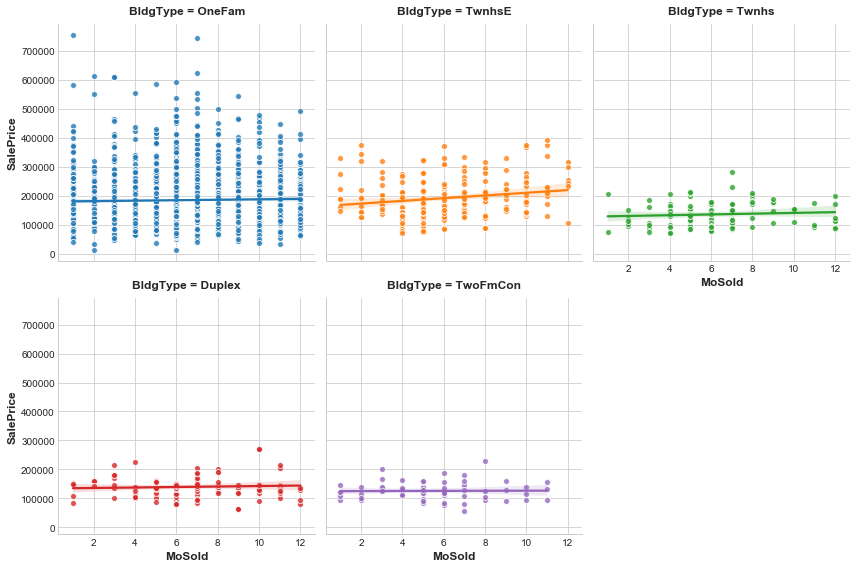

In [15]:
# YOUR CODE HERE: 
feature = "MoSold"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);